In [1]:
import random, time, os, sys, json
from tqdm import tqdm

In [2]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [4]:
'''
{2: [2],
 4: [2, 4],
 8: [2, 8],
 16: [2, 4, 16],
 32: [2, 32],
 64: [2, 4, 8, 64],
 128: [2, 128],
 256: [2, 4, 16, 256],
 512: [2, 8, 512],
 1024: [2, 4, 32, 1024],
 2048: [2, 2048],
 4096: [2, 4, 8, 16, 64, 4096],
 8192: [2, 8192],
 16384: [2, 4, 128, 16384]}
 '''

'\n{2: [2],\n 4: [2, 4],\n 8: [2, 8],\n 16: [2, 4, 16],\n 32: [2, 32],\n 64: [2, 4, 8, 64],\n 128: [2, 128],\n 256: [2, 4, 16, 256],\n 512: [2, 8, 512],\n 1024: [2, 4, 32, 1024],\n 2048: [2, 2048],\n 4096: [2, 4, 8, 16, 64, 4096],\n 8192: [2, 8192],\n 16384: [2, 4, 128, 16384]}\n '

In [5]:
bench_dict = {}
def load_json(model_name):
    with open(f'./models/stats/{model_name}_stats.json') as f:
        data = json.load(f)
    bench_dict[model_name] = data
    return

In [6]:
mlp_dims_scale = {
    64: [2, 4, 8],
    16: [2, 4, 8],
    8: [2, 4, 8],
    4: [4, 8, 16],
    2: [4, 8, 16],
}

pwlf_grid_size = [3, 5, 9]

SEEDS = [147, 258, 369]

def load_benchmark_cifar10():
    for seed in SEEDS:
        ## First test MLP with allowed dimension mixing
        for dim, hid_dim in mlp_dims_scale.items(): ## For 1024 these are the factors
            for hr in hid_dim:
                model_name = f"cifar10_BlockMLP_b{dim}_h{hr}_s{seed}"
                load_json(model_name)

            model_name = f"cifar10_SparseMLP_b{dim}_s{seed}"
            load_json(model_name)
            
            model_name = f"cifar10_SparseMLP_PWLF_b{dim}_s{seed}"
            load_json(model_name)
            
        for gsz in pwlf_grid_size:
            model_name = f"cifar10_PairPWLF_g{gsz}_s{seed}"
            load_json(model_name)
        
        model_name = f"cifar10_OrdinaryMLP_s{seed}"
        load_json(model_name)

In [7]:
load_benchmark_cifar10()

In [8]:
bench_dict

{'cifar10_BlockMLP_b64_h2_s147': {'num_param': 2170890,
  'latency': {'mean': 0.0003950511114285015, 'std': 0.00024372810063025486},
  'train_acc': [36.632,
   43.662,
   46.414,
   47.948,
   49.588,
   50.544,
   51.592,
   52.398,
   53.366,
   53.792,
   54.248,
   55.03,
   55.704,
   56.514,
   56.48,
   56.938,
   57.806,
   58.298,
   58.682,
   59.166,
   59.224,
   59.678,
   60.246,
   60.248,
   60.812,
   60.968,
   61.27,
   61.64,
   61.632,
   62.248,
   62.568,
   62.758,
   63.006,
   63.184,
   63.534,
   63.772,
   63.994,
   64.166,
   64.224,
   64.45,
   64.892,
   65.156,
   65.37,
   65.494,
   65.648,
   66.104,
   66.292,
   66.238,
   66.486,
   66.834,
   67.054,
   67.082,
   67.478,
   67.582,
   67.972,
   68.044,
   67.96,
   68.46,
   68.646,
   68.724,
   68.824,
   69.192,
   68.692,
   69.58,
   69.566,
   69.734,
   69.786,
   69.966,
   70.256,
   70.144,
   70.49,
   70.66,
   70.854,
   70.992,
   70.982,
   71.536,
   71.618,
   71.734,
   71.5

In [9]:
list(bench_dict.keys())

['cifar10_BlockMLP_b64_h2_s147',
 'cifar10_BlockMLP_b64_h4_s147',
 'cifar10_BlockMLP_b64_h8_s147',
 'cifar10_SparseMLP_b64_s147',
 'cifar10_SparseMLP_PWLF_b64_s147',
 'cifar10_BlockMLP_b16_h2_s147',
 'cifar10_BlockMLP_b16_h4_s147',
 'cifar10_BlockMLP_b16_h8_s147',
 'cifar10_SparseMLP_b16_s147',
 'cifar10_SparseMLP_PWLF_b16_s147',
 'cifar10_BlockMLP_b8_h2_s147',
 'cifar10_BlockMLP_b8_h4_s147',
 'cifar10_BlockMLP_b8_h8_s147',
 'cifar10_SparseMLP_b8_s147',
 'cifar10_SparseMLP_PWLF_b8_s147',
 'cifar10_BlockMLP_b4_h4_s147',
 'cifar10_BlockMLP_b4_h8_s147',
 'cifar10_BlockMLP_b4_h16_s147',
 'cifar10_SparseMLP_b4_s147',
 'cifar10_SparseMLP_PWLF_b4_s147',
 'cifar10_BlockMLP_b2_h4_s147',
 'cifar10_BlockMLP_b2_h8_s147',
 'cifar10_BlockMLP_b2_h16_s147',
 'cifar10_SparseMLP_b2_s147',
 'cifar10_SparseMLP_PWLF_b2_s147',
 'cifar10_PairPWLF_g3_s147',
 'cifar10_PairPWLF_g5_s147',
 'cifar10_PairPWLF_g9_s147',
 'cifar10_OrdinaryMLP_s147',
 'cifar10_BlockMLP_b64_h2_s258',
 'cifar10_BlockMLP_b64_h4_s258',
 

## Filter out the best test acc ones

In [10]:
for k, v in bench_dict.items():
    print(k, max(v['test_acc']))

cifar10_BlockMLP_b64_h2_s147 68.02
cifar10_BlockMLP_b64_h4_s147 68.31
cifar10_BlockMLP_b64_h8_s147 68.44
cifar10_SparseMLP_b64_s147 65.35
cifar10_SparseMLP_PWLF_b64_s147 65.76
cifar10_BlockMLP_b16_h2_s147 68.72
cifar10_BlockMLP_b16_h4_s147 70.24
cifar10_BlockMLP_b16_h8_s147 71.01
cifar10_SparseMLP_b16_s147 65.82
cifar10_SparseMLP_PWLF_b16_s147 66.15
cifar10_BlockMLP_b8_h2_s147 68.44
cifar10_BlockMLP_b8_h4_s147 69.47
cifar10_BlockMLP_b8_h8_s147 71.05
cifar10_SparseMLP_b8_s147 65.78
cifar10_SparseMLP_PWLF_b8_s147 67.24
cifar10_BlockMLP_b4_h4_s147 69.79
cifar10_BlockMLP_b4_h8_s147 70.75
cifar10_BlockMLP_b4_h16_s147 71.82
cifar10_SparseMLP_b4_s147 65.35
cifar10_SparseMLP_PWLF_b4_s147 67.06
cifar10_BlockMLP_b2_h4_s147 68.25
cifar10_BlockMLP_b2_h8_s147 68.95
cifar10_BlockMLP_b2_h16_s147 69.29
cifar10_SparseMLP_b2_s147 63.45
cifar10_SparseMLP_PWLF_b2_s147 66.76
cifar10_PairPWLF_g3_s147 62.25
cifar10_PairPWLF_g5_s147 63.41
cifar10_PairPWLF_g9_s147 49.33
cifar10_OrdinaryMLP_s147 61.43
cifar10_B

In [11]:
best_bench = dict()
for k, v in bench_dict.items():
    print(k)
    k = k[:-5]
    if k not in best_bench:
        print("initialize")
        best_bench[k] = v
        print(f'best acc {max(v["test_acc"])}')
    else:
        ## check if this one has higher test acc
        if max(v['test_acc']) > max(best_bench[k]['test_acc']):
            best_bench[k] = v
            print(f'better acc {max(v["test_acc"])}')
        else:
            print(f'worse acc {max(v["test_acc"])}')

    print()

cifar10_BlockMLP_b64_h2_s147
initialize
best acc 68.02

cifar10_BlockMLP_b64_h4_s147
initialize
best acc 68.31

cifar10_BlockMLP_b64_h8_s147
initialize
best acc 68.44

cifar10_SparseMLP_b64_s147
initialize
best acc 65.35

cifar10_SparseMLP_PWLF_b64_s147
initialize
best acc 65.76

cifar10_BlockMLP_b16_h2_s147
initialize
best acc 68.72

cifar10_BlockMLP_b16_h4_s147
initialize
best acc 70.24

cifar10_BlockMLP_b16_h8_s147
initialize
best acc 71.01

cifar10_SparseMLP_b16_s147
initialize
best acc 65.82

cifar10_SparseMLP_PWLF_b16_s147
initialize
best acc 66.15

cifar10_BlockMLP_b8_h2_s147
initialize
best acc 68.44

cifar10_BlockMLP_b8_h4_s147
initialize
best acc 69.47

cifar10_BlockMLP_b8_h8_s147
initialize
best acc 71.05

cifar10_SparseMLP_b8_s147
initialize
best acc 65.78

cifar10_SparseMLP_PWLF_b8_s147
initialize
best acc 67.24

cifar10_BlockMLP_b4_h4_s147
initialize
best acc 69.79

cifar10_BlockMLP_b4_h8_s147
initialize
best acc 70.75

cifar10_BlockMLP_b4_h16_s147
initialize
best acc 71.

In [12]:
del best_bench['cifar10_PairPWLF_g9']

## Plot training curve

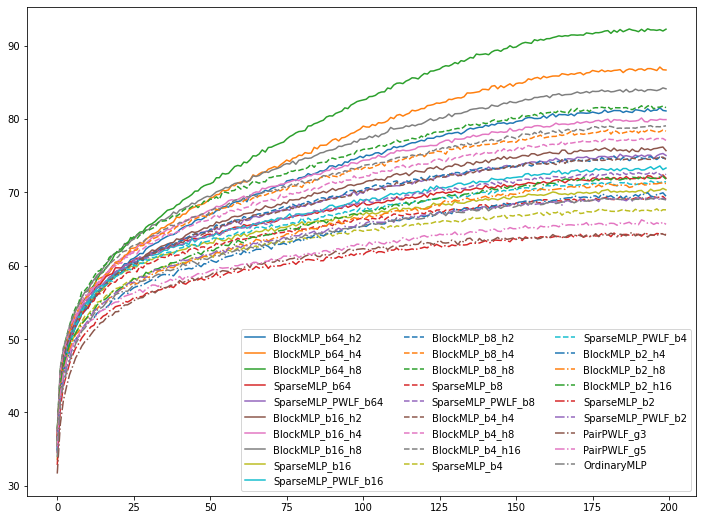

In [13]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i < 10:
        linestyle = None
    elif i < 20:
        linestyle='dashed'
    else:
        linestyle = 'dashdot'
        
    plt.plot(stat["train_acc"], label=model_name[8:], linestyle=linestyle)
plt.legend(ncol=3)

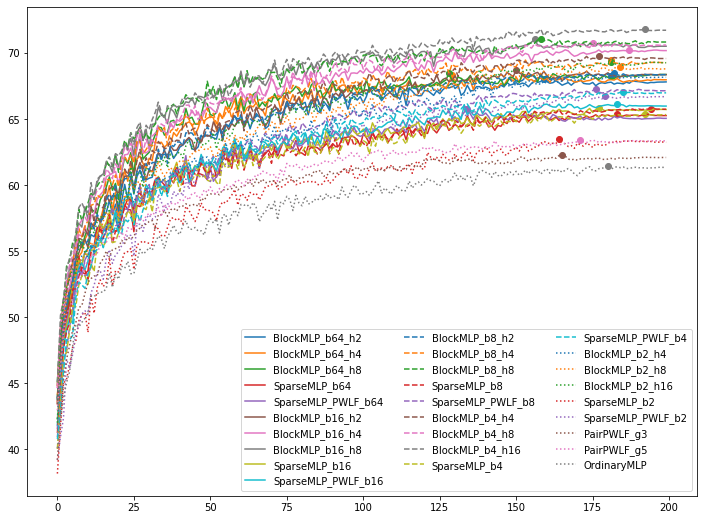

In [14]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i < 10:
        linestyle = None
    elif i < 20:
        linestyle='dashed'
    else:
        linestyle = 'dotted'

    acc = stat["test_acc"]
    plt.plot(acc, label=model_name[8:], linestyle=linestyle)
    plt.scatter(np.argmax(acc), np.max(acc))
plt.legend(ncol=3)

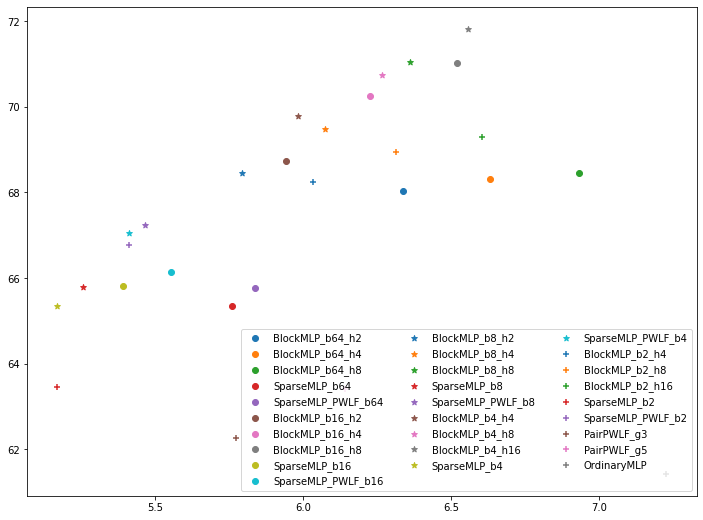

In [15]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i//10 == 0:
        marker='o'
    elif i//10 == 1:
        marker='*'
    elif i//10 == 2:
        marker='+'
    else:
        marker = '_'

    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
#     acc = np.max(stat["train_acc"])
    plt.scatter(n_params, acc, label=model_name[8:], marker=marker)
plt.legend(ncol=3)

Text(0, 0.5, 'test accuracy')

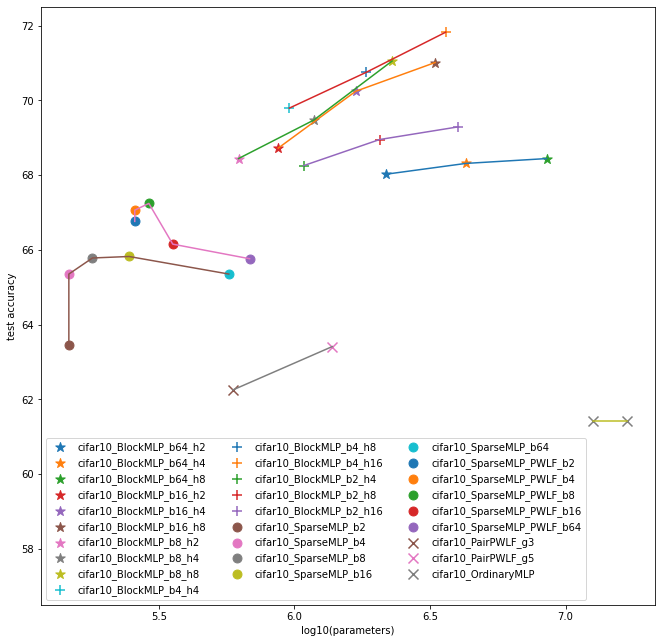

In [27]:
plt.figure(figsize=(11, 11))

## first plot the BlockMLP32
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'cifar10_BlockMLP_b64'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for Block 16
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'cifar10_BlockMLP_b16'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for Block 8
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'cifar10_BlockMLP_b8'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)


### Plot for Block 4
xs, ys = [], [] 
for h in [4, 8, 16]:
    model = 'cifar10_BlockMLP_b4'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='+', s=100)
    
plt.plot(xs, ys)


### Plot for Block 2
xs, ys = [], [] 
for h in [4, 8, 16]:
    model = 'cifar10_BlockMLP_b2'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='+', s=100)
    
plt.plot(xs, ys)

### Plot for sparse Weights
xs, ys = [], [] 
for b in [2, 4, 8, 16, 64]:
    model = f'cifar10_SparseMLP_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='o', s=80)
    
plt.plot(xs, ys)

### Plot for sparse Weights + PWLF (b5)
xs, ys = [], [] 
for b in [2, 4, 8, 16, 64]:
    model = f'cifar10_SparseMLP_PWLF_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='o', s=80)
    
plt.plot(xs, ys)

# ### Plot for PWLF grids
xs, ys = [], [] 
for b in [3, 5]:
    model = f'cifar10_PairPWLF_g{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='x', s=100)
    
plt.plot(xs, ys)

### For Ordinary MLP
model = f'cifar10_OrdinaryMLP'
stat = best_bench[model]

n_params = stat['num_param']
n_params = np.log10(n_params)

acc = np.max(stat["test_acc"])

# plt.scatter(n_params, acc, label=model, marker='x', s=100)
### The plot below plots for total params and equivalent parameters
### (dimension selector parameters are redundent)
plt.scatter([n_params, n_params+np.log10(3/4)], [acc, acc], label=model, marker='x', s=100)
plt.plot([n_params, n_params+np.log10(3/4)], [acc, acc])

plt.ylim((56.5, 72.5))
plt.legend(loc=3, ncol=3)
plt.xlabel("log10(parameters)")
plt.ylabel("test accuracy")

In [28]:
list(best_bench.keys())

['cifar10_BlockMLP_b64_h2',
 'cifar10_BlockMLP_b64_h4',
 'cifar10_BlockMLP_b64_h8',
 'cifar10_SparseMLP_b64',
 'cifar10_SparseMLP_PWLF_b64',
 'cifar10_BlockMLP_b16_h2',
 'cifar10_BlockMLP_b16_h4',
 'cifar10_BlockMLP_b16_h8',
 'cifar10_SparseMLP_b16',
 'cifar10_SparseMLP_PWLF_b16',
 'cifar10_BlockMLP_b8_h2',
 'cifar10_BlockMLP_b8_h4',
 'cifar10_BlockMLP_b8_h8',
 'cifar10_SparseMLP_b8',
 'cifar10_SparseMLP_PWLF_b8',
 'cifar10_BlockMLP_b4_h4',
 'cifar10_BlockMLP_b4_h8',
 'cifar10_BlockMLP_b4_h16',
 'cifar10_SparseMLP_b4',
 'cifar10_SparseMLP_PWLF_b4',
 'cifar10_BlockMLP_b2_h4',
 'cifar10_BlockMLP_b2_h8',
 'cifar10_BlockMLP_b2_h16',
 'cifar10_SparseMLP_b2',
 'cifar10_SparseMLP_PWLF_b2',
 'cifar10_PairPWLF_g3',
 'cifar10_PairPWLF_g5',
 'cifar10_OrdinaryMLP']

In [31]:
np.log10(3/4)

-0.12493873660829993

## For train accuracy

Text(0, 0.5, 'train accuracy')

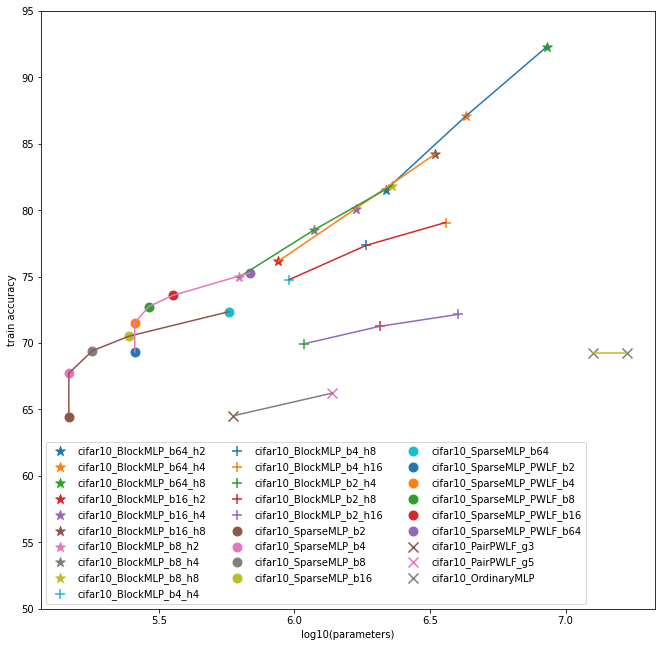

In [30]:
plt.figure(figsize=(11, 11))

## first plot the BlockMLP32
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'cifar10_BlockMLP_b64'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for Block 16
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'cifar10_BlockMLP_b16'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)

### Plot for Block 8
xs, ys = [], [] 
for h in [2, 4, 8]:
    model = 'cifar10_BlockMLP_b8'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='*', s=100)
    
plt.plot(xs, ys)


### Plot for Block 4
xs, ys = [], [] 
for h in [4, 8, 16]:
    model = 'cifar10_BlockMLP_b4'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='+', s=100)
    
plt.plot(xs, ys)


### Plot for Block 2
xs, ys = [], [] 
for h in [4, 8, 16]:
    model = 'cifar10_BlockMLP_b2'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='+', s=100)
    
plt.plot(xs, ys)

### Plot for sparse Weights
xs, ys = [], [] 
for b in [2, 4, 8, 16, 64]:
    model = f'cifar10_SparseMLP_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='o', s=80)
    
plt.plot(xs, ys)

### Plot for sparse Weights + PWLF (b5)
xs, ys = [], [] 
for b in [2, 4, 8, 16, 64]:
    model = f'cifar10_SparseMLP_PWLF_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='o', s=80)
    
plt.plot(xs, ys)

# ### Plot for PWLF grids
xs, ys = [], [] 
for b in [3, 5]:
    model = f'cifar10_PairPWLF_g{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["train_acc"])
    xs += [n_params]
    ys += [acc]
    plt.scatter(n_params, acc, label=model, marker='x', s=100)
    
plt.plot(xs, ys)

### For Ordinary MLP
model = f'cifar10_OrdinaryMLP'
stat = best_bench[model]

n_params = stat['num_param']
n_params = np.log10(n_params)

acc = np.max(stat["train_acc"])
# plt.scatter(n_params, acc, label=model, marker='x', s=100)

plt.scatter([n_params, n_params+np.log10(3/4)], [acc, acc], label=model, marker='x', s=100)
plt.plot([n_params, n_params+np.log10(3/4)], [acc, acc])

plt.ylim((50, 95))
plt.legend(loc=3, ncol=3)
plt.xlabel("log10(parameters)")
plt.ylabel("train accuracy")